In [608]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [609]:
# Assign spreadsheet filename to `file`
file = 'Flats.xls'

# Load spreadsheet
xl = pd.ExcelFile(file)

# Load a sheet into a DataFrame by name: df1
df = xl.parse('Лист1')
df.head()

,LIVSQ,APPEN,KITSQ,DIST,METRDIST,WALK,BRICK,TEL,BAL,FLOOR,ROOM,PRICE
0,20.0,6.0,10.0,0.85,5.0,1,0,1,0,1,1,65.0
1,19.8,11.2,9.0,3.93,2.0,1,0,1,1,1,1,43.0
2,19.0,5.9,9.6,3.93,5.0,1,0,1,1,0,1,34.0
3,17.6,17.3,7.9,4.47,5.0,1,1,1,1,1,1,75.0
4,19.0,7.6,6.0,4.47,10.0,1,1,1,0,1,1,35.0


In [610]:
def preparing_data(data, a, b):
    data_new = pd.DataFrame(data.loc[data['ROOM'].isin([a,b])]).reset_index(drop=True)
    data_new.loc[data_new['ROOM'] != a, 'ROOM'] = 0
    data_new.loc[data_new['ROOM'] == a, 'ROOM'] = 1
    #print(data_new)
    X = data_new[["LIVSQ", "APPEN", "KITSQ", "DIST", "METRDIST"]]
    y =  data_new["ROOM"]
    return  data_new, X, y

### Метод РСА. Посмотрим на то, как наши параметры объясняют диспресию.

In [611]:
from sklearn.decomposition import PCA

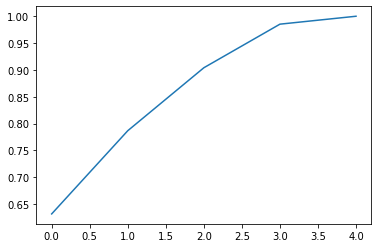

In [612]:
a = 2
b = 3
data, X, y = preparing_data(df, a, b)

pca = PCA(n_components=5).fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

### Сократим количество компонент до 2-х

In [613]:
pca = PCA(n_components=2)
print("Explained Variance: ", fit.explained_variance_ratio_)

Explained Variance:  [0.63179587 0.1549708 ]


In [614]:
from sklearn.preprocessing import StandardScaler

X = (X - np.mean(X, 0)) / np.std(X, 0) #нормализуем и шкалируем данные
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [615]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data['ROOM']], axis = 1)
finalDf.head()

,principal component 1,principal component 2,ROOM
0,0.864648,-1.647861,1
1,-0.694193,-1.763292,1
2,0.054038,-1.868389,1
3,-2.171523,-1.349532,1
4,-1.778139,0.534151,1


1 =  2 комнатные
0 =  3 комнатные


<Figure size 432x288 with 0 Axes>

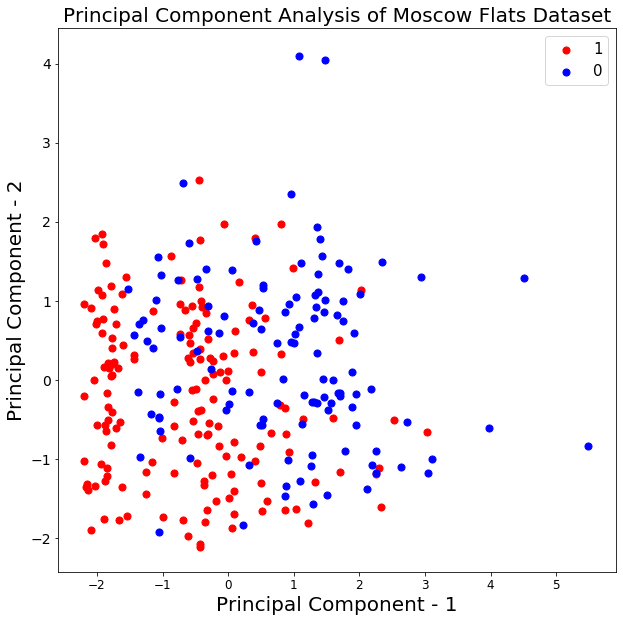

In [617]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Moscow Flats Dataset",fontsize=20)
targets = [1, 0]
print("1 = ", a, "комнатные")
print("0 = ", b, "комнатные")
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['ROOM'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [618]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [619]:
cross_val_score(pca, X, y, cv=5).mean()

-7.187396011482915

In [620]:
pca.score(X, y)

-6.793335685782032

### Логистическая регрессия для n=5 компонент

In [621]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [622]:
a = 2
b = 3
data, X, y = preparing_data(df, a, b)


In [623]:
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.25, random_state=42)

In [624]:
classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [625]:
y_pred = classifier.predict(X_test)

In [626]:
classifier.predict_proba(X_test)[:10]
#первая цифра - вероятность отнесения к 1 классу, то есть к 1
# вторая- ко второму классу, то есть 0

array([[0.00528991, 0.99471009],
       [0.62987542, 0.37012458],
       [0.11963411, 0.88036589],
       [0.95614298, 0.04385702],
       [0.37785571, 0.62214429],
       [0.97509417, 0.02490583],
       [0.99741496, 0.00258504],
       [0.98617465, 0.01382535],
       [0.02190145, 0.97809855],
       [0.98490707, 0.01509293]])

In [627]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[28  1]
 [ 1 41]]


In [628]:
from sklearn.metrics import accuracy_score

print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.971830985915493


In [629]:
cross_val_score(classifier, X_train, y_train, cv = 5).mean()

0.9573593073593074

 ### Логистическая регрессия для n=2 главных компонент. Метод PCA

In [630]:
X_l = finalDf[['principal component 1', 'principal component 1']]
y_l = finalDf['ROOM']

In [631]:
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X_l), y_l, test_size=0.25, random_state=42)

In [632]:
classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [633]:
y_pred = classifier.predict(X_test)

In [634]:
from sklearn.metrics import accuracy_score

print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7323943661971831
